In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from keras import models
from keras import layers
import tensorflow as tf
from keras.models import Sequential # 신경망 모델 생성자함수
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from keras.models import load_model # 신경망 모델 파일 불러오기
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping # 학습조기종료

import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split 
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("./data/MiceImputed_weather.csv")

In [4]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [5]:
y = df['TomorrowRain'].values
X = df.drop(['TomorrowRain'], axis=1)
x=X.values

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)
x_train.shape

(274964, 22)

In [8]:
import sklearn.metrics as mt # 성능지표를 계산import sklearn.metrics as mt
def get_clf_eval(y_test, pred=None):
    confusion = mt.confusion_matrix( y_test, pred)
    accuracy = mt.accuracy_score(y_test , pred)
    precision = mt.precision_score(y_test , pred)
    recall = mt.recall_score(y_test , pred)
    f1 = mt.f1_score(y_test,pred)

    print('오차 행렬:')
    print(confusion)
    
    print('\n정확도: {0:.4f} \n정밀도: {1:.4f} \n재현율: {2:.4f} \n    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [11]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model1 = Sequential()
model1.add(Embedding(274964, embedding_vecor_length, input_length=22))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

history=model1.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 22)            6049208   
                                                                 
 dropout (Dropout)           (None, 22, 22)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               49200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 6,098,509
Trainable params: 6,098,509
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
8593/8593 [==================

Epoch 49/150
8593/8593 [==============================] - 56s 6ms/step - loss: 0.1118 - accuracy: 0.9545
Epoch 50/150
8593/8593 [==============================] - 56s 7ms/step - loss: 0.1110 - accuracy: 0.9546
Epoch 51/150
8593/8593 [==============================] - 56s 7ms/step - loss: 0.1124 - accuracy: 0.9544
Epoch 52/150
8593/8593 [==============================] - 56s 7ms/step - loss: 0.1114 - accuracy: 0.9549
Epoch 53/150
8593/8593 [==============================] - 64s 7ms/step - loss: 0.1105 - accuracy: 0.9547
Epoch 54/150
8593/8593 [==============================] - 67s 8ms/step - loss: 0.1113 - accuracy: 0.9548
Epoch 55/150
8593/8593 [==============================] - 56s 6ms/step - loss: 0.1101 - accuracy: 0.9554
Epoch 56/150
8593/8593 [==============================] - 56s 7ms/step - loss: 0.1108 - accuracy: 0.9546
Epoch 57/150
8593/8593 [==============================] - 56s 7ms/step - loss: 0.1106 - accuracy: 0.9548
Epoch 58/150
8593/8593 [==============================]

8593/8593 [==============================] - 59s 7ms/step - loss: 0.1087 - accuracy: 0.9558
Epoch 75/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1084 - accuracy: 0.9561
Epoch 76/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1087 - accuracy: 0.9558
Epoch 77/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1078 - accuracy: 0.9561
Epoch 78/150
8593/8593 [==============================] - 59s 7ms/step - loss: 0.1078 - accuracy: 0.9562
Epoch 79/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1092 - accuracy: 0.9559
Epoch 80/150
8593/8593 [==============================] - 59s 7ms/step - loss: 0.1088 - accuracy: 0.9563
Epoch 81/150
8593/8593 [==============================] - 59s 7ms/step - loss: 0.1079 - accuracy: 0.9563
Epoch 82/150
8593/8593 [==============================] - 59s 7ms/step - loss: 0.1086 - accuracy: 0.9557
Epoch 83/150
8593/8593 [==============================] - 59s 7ms/st

8593/8593 [==============================] - 59s 7ms/step - loss: 0.1071 - accuracy: 0.9569
Epoch 101/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1076 - accuracy: 0.9568
Epoch 102/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1078 - accuracy: 0.9567
Epoch 103/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1069 - accuracy: 0.9571
Epoch 104/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1067 - accuracy: 0.9576
Epoch 105/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1076 - accuracy: 0.9566
Epoch 106/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1058 - accuracy: 0.9573
Epoch 107/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1070 - accuracy: 0.9570
Epoch 108/150
8593/8593 [==============================] - 58s 7ms/step - loss: 0.1069 - accuracy: 0.9570
Epoch 109/150
8593/8593 [==============================] - 5

In [12]:
y_pred1 = model1.predict(x_test)
y_pred1 = (y_pred1 > 0.5)
print(y_pred1)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [13]:
get_clf_eval(y_test,y_pred1)

오차 행렬:
[[52605  1969]
 [ 2163 12005]]

정확도: 0.9399 
정밀도: 0.8591 
재현율: 0.8473 
    F1: 0.8532


In [37]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model2 = Sequential()
model2.add(Embedding(274964, embedding_vecor_length, input_length=22))
model2.add(Dropout(0.2))
model2.add(LSTM(150))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

history2=model2.fit(x_train, y_train, epochs=200, batch_size=64,validation_data= (x_test,y_test),callbacks=[early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 22, 22)            6049208   
                                                                 
 dropout_8 (Dropout)         (None, 22, 22)            0         
                                                                 
 lstm_4 (LSTM)               (None, 150)               103800    
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 6,153,159
Trainable params: 6,153,159
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
4297/4297 [================

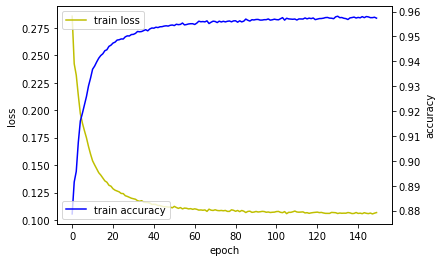

In [23]:

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
#loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
#acc_ax.plot(history.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [25]:
model1.save('lstmBestModel')


INFO:tensorflow:Assets written to: lstmBestModel\assets


INFO:tensorflow:Assets written to: lstmBestModel\assets


In [26]:
model1.save('my_model.h5')


In [27]:
new_model = tf.keras.models.load_model('my_model.h5')


In [40]:
y_pred2 = model2.predict(x_test)
y_pred2 = (y_pred2 > 0.5)
print(y_pred2)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [41]:
get_clf_eval(y_test,y_pred2)

오차 행렬:
[[52834  1740]
 [ 2641 11527]]

정확도: 0.9363 
정밀도: 0.8688 
재현율: 0.8136 
    F1: 0.8403


In [42]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model2 = Sequential()
model2.add(Embedding(274964, embedding_vecor_length, input_length=22))
model2.add(Dropout(0.2))
model2.add(LSTM(100))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

history2=model2.fit(x_train, y_train, epochs=200, batch_size=32,validation_data= (x_test,y_test),callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 22, 22)            6049208   
                                                                 
 dropout_10 (Dropout)        (None, 22, 22)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               49200     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6,098,509
Trainable params: 6,098,509
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
8593/8593 [================

In [43]:
y_pred2 = model2.predict(x_test)
y_pred2 = (y_pred2 > 0.5)
print(y_pred2)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [44]:
get_clf_eval(y_test,y_pred2)

오차 행렬:
[[52830  1744]
 [ 2637 11531]]

정확도: 0.9363 
정밀도: 0.8686 
재현율: 0.8139 
    F1: 0.8404


In [8]:
x_val = x_train[:68742]
x_train = x_train[68742:]

y_val = y_train[:68742] 
y_train = y_train[68742:]
x_train.shape

(206222, 22)

In [11]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model1 = Sequential()
model1.add(Embedding(206222, embedding_vecor_length, input_length=22))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

history=model1.fit(x_train, y_train, epochs=150, batch_size=64,callbacks=[early_stopping],validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 22, 22)            4536884   
                                                                 
 dropout_2 (Dropout)         (None, 22, 22)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               49200     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,586,185
Trainable params: 4,586,185
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
3223/3223 [================

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model1 = Sequential()
model1.add(Embedding(206222, embedding_vecor_length, input_length=22))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

history=model1.fit(x_train, y_train, epochs=150, batch_size=64,callbacks=[early_stopping],validation_data=(x_val, y_val))

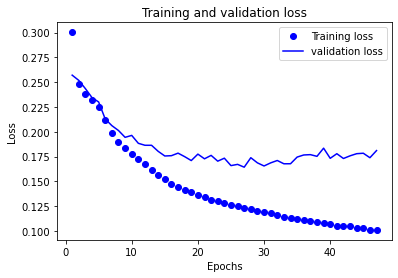

In [12]:
import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
df=pd.read_csv("./data/scaled_MiceImputed_weather.csv")
df.drop(['Unnamed: 0'], axis=1,inplace=True)
y = df['TomorrowRain'].values
X = df.drop(['TomorrowRain'], axis=1)
x=X.values

In [4]:
y = df['TomorrowRain'].values
X = df.drop(['TomorrowRain'], axis=1)
x=X.values

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)
x_train.shape

(274964, 22)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model4 = Sequential()
model4.add(Embedding(274964, embedding_vecor_length, input_length=22))
model4.add(Dropout(0.2))
model4.add(LSTM(100))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

history=model4.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 22, 22)            6049208   
                                                                 
 dropout_10 (Dropout)        (None, 22, 22)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               49200     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6,098,509
Trainable params: 6,098,509
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
8593/8593 [================

In [6]:
x_val = x_train[:68742]
x_train = x_train[68742:]

y_val = y_train[:68742] 
y_train = y_train[68742:]
x_train.shape

(206222, 22)

In [10]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model5 = Sequential()
model5.add(Embedding(206222, embedding_vecor_length, input_length=22))
model5.add(Dropout(0.2))
model5.add(LSTM(125))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model5.summary())

history=model5.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping],validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 22)            4536884   
                                                                 
 dropout (Dropout)           (None, 22, 22)            0         
                                                                 
 lstm (LSTM)                 (None, 125)               74000     
                                                                 
 dropout_1 (Dropout)         (None, 125)               0         
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 4,611,010
Trainable params: 4,611,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
6445/6445 [==================

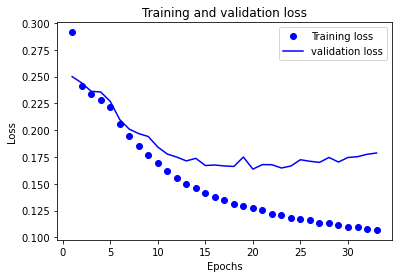

In [11]:
import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
y_pred5 = model5.predict(x_test)
y_pred5 = (y_pred5 > 0.5)
get_clf_eval(y_test,y_pred5)

오차 행렬:
[[52456  2118]
 [ 2659 11509]]

정확도: 0.9305 
정밀도: 0.8446 
재현율: 0.8123 
    F1: 0.8281


In [14]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model4 = Sequential()
model4.add(Embedding(206222, embedding_vecor_length, input_length=22))
model4.add(Dropout(0.2))
model4.add(LSTM(100))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

history=model4.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping],validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 22, 22)            4536884   
                                                                 
 dropout_4 (Dropout)         (None, 22, 22)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               49200     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,586,185
Trainable params: 4,586,185
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
6445/6445 [================

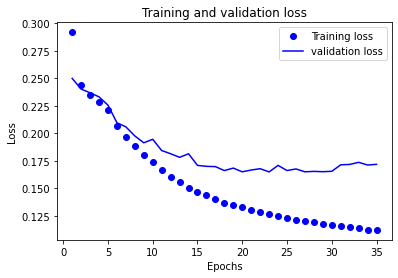

오차 행렬:
[[52658  1916]
 [ 2768 11400]]

정확도: 0.9319 
정밀도: 0.8561 
재현율: 0.8046 
    F1: 0.8296


In [15]:
import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
y_pred4 = model4.predict(x_test)
y_pred4 = (y_pred4 > 0.5)
get_clf_eval(y_test,y_pred4)

In [16]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model4 = Sequential()
model4.add(Embedding(206222, embedding_vecor_length, input_length=22))
model4.add(Dropout(0.2))
model4.add(LSTM(75))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

history=model4.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping],validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 22, 22)            4536884   
                                                                 
 dropout_6 (Dropout)         (None, 22, 22)            0         
                                                                 
 lstm_3 (LSTM)               (None, 75)                29400     
                                                                 
 dropout_7 (Dropout)         (None, 75)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 76        
                                                                 
Total params: 4,566,360
Trainable params: 4,566,360
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
6445/6445 [================

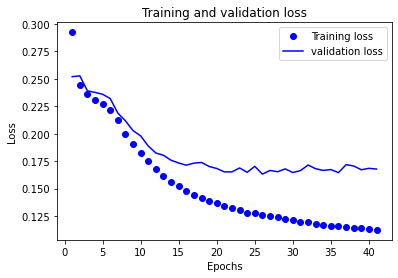

오차 행렬:
[[52582  1992]
 [ 2459 11709]]

정확도: 0.9353 
정밀도: 0.8546 
재현율: 0.8264 
    F1: 0.8403


In [17]:
import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
y_pred4 = model4.predict(x_test)
y_pred4 = (y_pred4 > 0.5)
get_clf_eval(y_test,y_pred4)

In [7]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model4 = Sequential()
model4.add(Embedding(206222, embedding_vecor_length, input_length=22))
model4.add(Dropout(0.2))
model4.add(LSTM(75))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

history=model4.fit(x_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping],validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 22)            4536884   
                                                                 
 dropout (Dropout)           (None, 22, 22)            0         
                                                                 
 lstm (LSTM)                 (None, 75)                29400     
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 4,566,360
Trainable params: 4,566,360
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
6445/6445 [==================

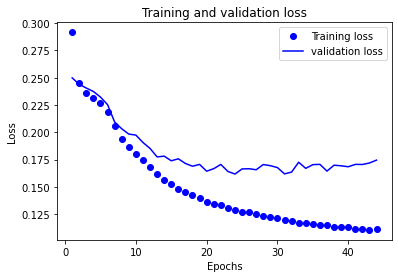

오차 행렬:
[[52923  1651]
 [ 2721 11447]]

정확도: 0.9364 
정밀도: 0.8740 
재현율: 0.8079 
    F1: 0.8397


In [10]:
import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
y_pred4 = model4.predict(x_test)
y_pred4 = (y_pred4 > 0.5)
get_clf_eval(y_test,y_pred4)

In [3]:
df=pd.read_csv("./data/scaled_MiceImputed_weather.csv")
df.drop(['Unnamed: 0'], axis=1,inplace=True)
Y = df['TomorrowRain'].values
X = df.drop(['TomorrowRain'], axis=1)
x=X.values

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,stratify = Y, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [5]:
X_train.shape

(219971, 22)

In [6]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

embedding_vecor_length = 22
model4 = Sequential()
model4.add(Embedding(219971, embedding_vecor_length, input_length=22))
model4.add(Dropout(0.2))
model4.add(LSTM(100))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

history=model4.fit(X_train, y_train, epochs=150, batch_size=32,callbacks=[early_stopping],validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 22)            4839362   
                                                                 
 dropout (Dropout)           (None, 22, 22)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               49200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 4,888,663
Trainable params: 4,888,663
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
6875/6875 [==================

In [9]:
y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4 > 0.5)
get_clf_eval(y_test,y_pred4)

오차 행렬:
[[53067  1635]
 [ 2787 11253]]

정확도: 0.9357 
정밀도: 0.8731 
재현율: 0.8015 
    F1: 0.8358


In [19]:
#model4.save('lstm0603.h5')


In [10]:
model4.save('lstm0603_scaled.h5')
